Epoch 0, loss=5771.5781, weight=1.0967, bias=0.2371
Epoch 100, loss=557.5608, weight=65.8047, bias=5.2143
Epoch 200, loss=342.3213, weight=79.0262, bias=4.5517
Epoch 300, loss=332.9984, weight=81.7622, bias=4.1916
Epoch 400, loss=332.5867, weight=82.3329, bias=4.0873
Epoch 500, loss=332.5684, weight=82.4526, bias=4.0616
Epoch 600, loss=332.5676, weight=82.4778, bias=4.0557
Epoch 700, loss=332.5675, weight=82.4831, bias=4.0544
Epoch 800, loss=332.5676, weight=82.4842, bias=4.0541
Epoch 900, loss=332.5676, weight=82.4843, bias=4.0541
torch.Size([100, 1]) (100,)


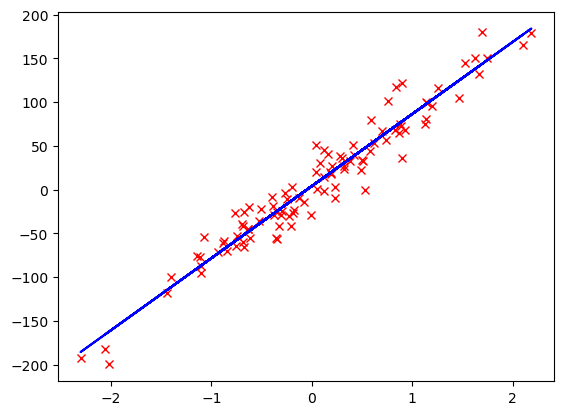

In [6]:
# 1 Design model (input and output size, forward pass)
# 2 Loss and Optimizer
# 3 Training Loop
#   - Forward pass (compute prediction and loss)
#   - Backward pass (gradients)
#   - Update weights

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0 - Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape
input_shape = n_features
output_shape = 1

# Model
model = nn.Linear(input_shape, output_shape)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training Loop
epochs = 1000
for epoch in range(epochs):

    # Forward Pass and loss calculation
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # Backward Pass
    loss.backward()

    # Update weights 
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 100 == 0:
        [w, b] = model.parameters()
        print(f"Epoch {epoch}, loss={loss.item():.4f}, weight={w[0][0]:.4f}, bias={b[0]:.4f}")
      


# Plot
predicted = model(X).detach()  # New tensor with require gradient as False
plt.plot(X_numpy, y_numpy, 'rx')
plt.plot(X_numpy, predicted, 'b')

print(predicted.shape, y_numpy.shape)